In [10]:
from common_imports import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [4]:
rank1_reduction_results = joblib.load('rank1_to_subspace_results.joblib')
rome_vs_subsp_rewrite_scores = joblib.load('rome_vs_subsp_results.joblib')

## Analyzing rewrite scores

In [11]:
def get_rewrite_score_df(rome_vs_subsp_rewrite_scores):
    rows = []
    for data in rome_vs_subsp_rewrite_scores:
        for metric in ('rome', 'subsp', 'subsp_rowspace', 'subsp_rowspace_10', 'subsp_rowspace_50'):
            rows.append({
                'layer': data['layer'],
                'fact_idx': data['fact_idx'],
                'metric': metric,
                'score': data[f'rewrite_score_{metric}'],
            })
    return pd.DataFrame(rows)

rewrite_score_df = get_rewrite_score_df(rome_vs_subsp_rewrite_scores)

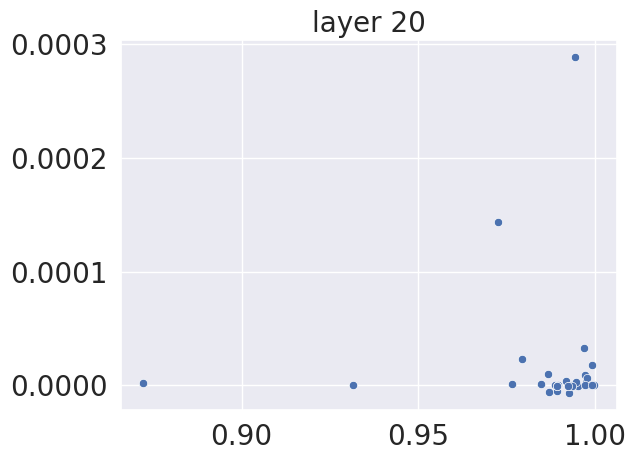

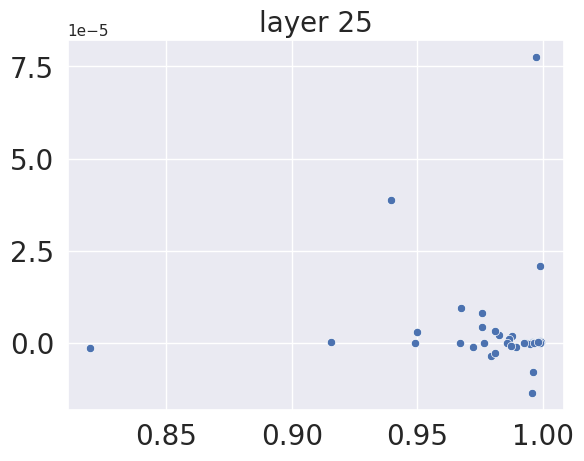

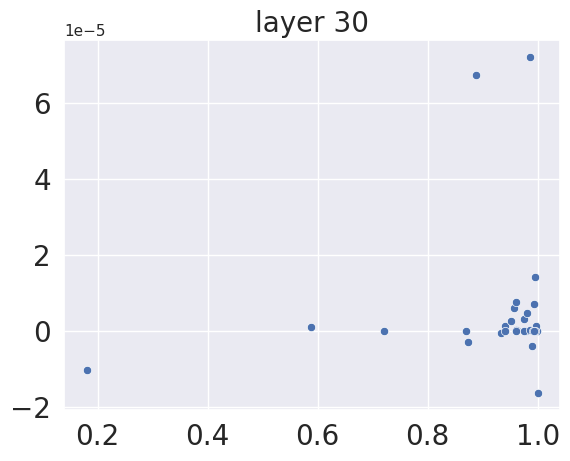

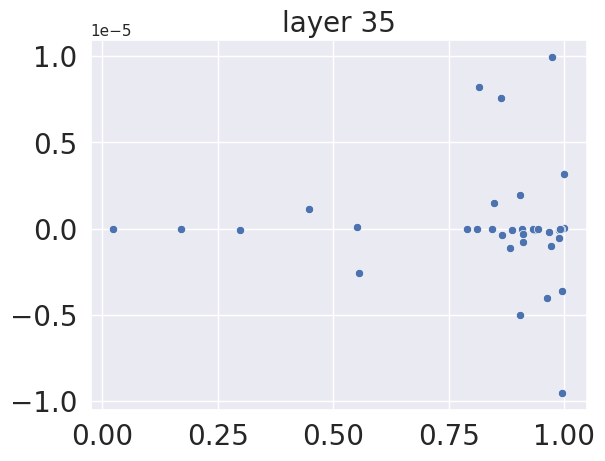

In [38]:
# make a dataframe comparing the rewrite scores of rome vs subsp
y_axis_metric = 'subsp_rowspace'
rewrite_score_rome_vs_subsp_df = rewrite_score_df.query(
    f'metric in ("rome", "{y_axis_metric}")').pivot(
        index=['layer', 'fact_idx'], columns='metric', values='score').reset_index()

for layer in (20, 25, 30, 35):
    sns.scatterplot(data=rewrite_score_rome_vs_subsp_df.query(f'layer == {layer}'), x='rome', y=y_axis_metric,)
    # remove x axis and y axis labels
    plt.gca().set(xlabel=None, ylabel=None,)
    # set the number of ticks on x axis and y axis
    plt.locator_params(axis='x', nbins=5)
    plt.locator_params(axis='y', nbins=5)
    # increase x, y tiks label size to 20
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(f'layer {layer}', fontsize=20)
    plt.savefig(f'layer_{layer}_rewrite_score_rome_vs_subsp.pdf', bbox_inches='tight')
    plt.show()


## Analyzing other metrics

In [96]:
def analyze_reduction_results(rows):
    # collect a dataframe of cosine simliarities between v and b 
    cosine_sim_rows = []
    for row in rows:
        cosine_sim_rows.append({
            'layer': row['layer'],
            'fact_idx': row['fact_idx'],
            'cosine_sim': torch.cosine_similarity(row['v'], row['b'], dim=0).abs().item(),
        })
    cosine_sim_df = pd.DataFrame(cosine_sim_rows)
    # collect a dataframe of the ratio of the variance introduced by our edit vs
    # the ROME edit
    variance_ratio_rows = []
    for row in rows:
        variance_ratio_rows.append({
            'layer': row['layer'],
            'fact_idx': row['fact_idx'],
            'var_ratio': (row['var_full'] / row['var_rome']).item(),
        })
    variance_ratio_df = pd.DataFrame(variance_ratio_rows)
    return cosine_sim_df, variance_ratio_df

In [110]:
cosine_sim_df, variance_ratio_df = analyze_reduction_results(rows)

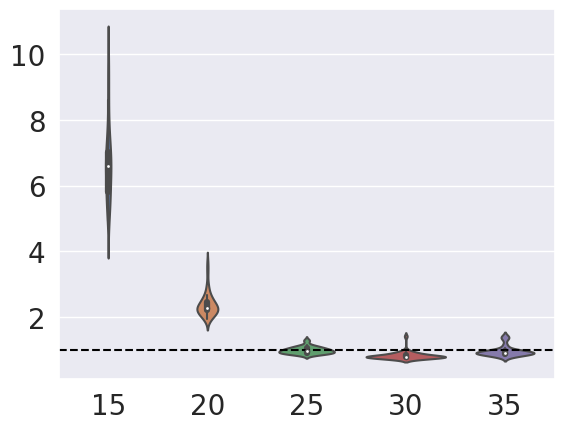

In [116]:
# violin plot of cosine similarities with layer on the x axis
# sns.violinplot(data=cosine_sim_df, x='layer', y='cosine_sim')
# violin plot of ratios of variance introduced with layer on the x axis
sns.violinplot(data=variance_ratio_df.query('15 <= layer < 40'), x='layer', y='var_ratio')
# draw a horizontal line at 1
plt.axhline(1, color='black', linestyle='--')
# remove the y axis label
plt.ylabel('')
# set the x axis label
plt.xlabel('')
# increase the fontsize for the x axis ticks
plt.xticks(fontsize=20)
# increase the fontsize for the y axis ticks
plt.yticks(fontsize=20)
# save to pdf
plt.savefig('figures/rank1_to_subspace_variance_ratio_violin.pdf', bbox_inches='tight')
plt.show()

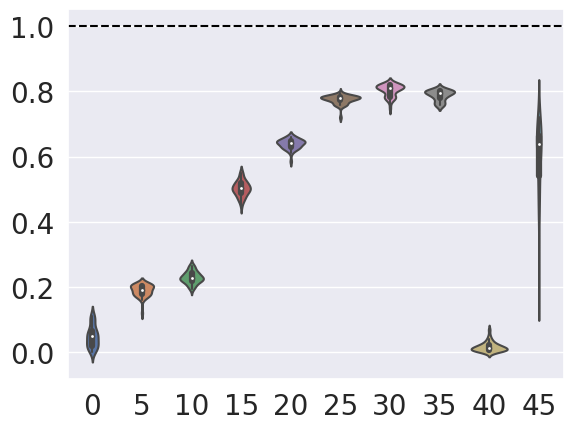

In [117]:
# violin plot of cosine similarities with layer on the x axis
sns.violinplot(data=cosine_sim_df, x='layer', y='cosine_sim')
# draw a horizontal line at 1
plt.axhline(1, color='black', linestyle='--')
# remove the y axis label
plt.ylabel('')
# set the x axis label
plt.xlabel('')
# increase the fontsize for the x axis ticks
plt.xticks(fontsize=20)
# increase the fontsize for the y axis ticks
plt.yticks(fontsize=20)
# save to pdf
plt.savefig('figures/rank1_to_subspace_cosine_sim_violin.pdf', bbox_inches='tight')
plt.show()